### Conjoint Analysis for Smartphone Market

In [1]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

#### Define all the attributes of a smartphone and make combination for each category in every attribute

In [2]:
screen_sizes = ["5.5\"", "6.1\"", "6.7\""]
battery_lifes = ["12 hrs", "18 hrs", "24 hrs"]
camera_qualities = ["12 MP", "48 MP", "108 MP"]
storage_capacities = ["64 GB", "128 GB", "256 GB"]
prices = ["$600", "$1000"]


# Generate full factorial design (all combinations)
all_combinations = list(itertools.product(screen_sizes, battery_lifes, camera_qualities, storage_capacities, prices))
design_df = pd.DataFrame(all_combinations, columns=["Screen Size", "Battery Life", "Camera Quality", "Storage Capacity", "Price"])
print(design_df)

    Screen Size Battery Life Camera Quality Storage Capacity  Price
0          5.5"       12 hrs          12 MP            64 GB   $600
1          5.5"       12 hrs          12 MP            64 GB  $1000
2          5.5"       12 hrs          12 MP           128 GB   $600
3          5.5"       12 hrs          12 MP           128 GB  $1000
4          5.5"       12 hrs          12 MP           256 GB   $600
..          ...          ...            ...              ...    ...
157        6.7"       24 hrs         108 MP            64 GB  $1000
158        6.7"       24 hrs         108 MP           128 GB   $600
159        6.7"       24 hrs         108 MP           128 GB  $1000
160        6.7"       24 hrs         108 MP           256 GB   $600
161        6.7"       24 hrs         108 MP           256 GB  $1000

[162 rows x 5 columns]


In [3]:
# Randomly select 10 samples to create a fractional factorial-like design
fractional_design_df = design_df.sample(10, random_state=3).reset_index(drop=True)
print(fractional_design_df)

  Screen Size Battery Life Camera Quality Storage Capacity  Price
0        6.1"       12 hrs         108 MP           256 GB   $600
1        6.7"       18 hrs         108 MP           128 GB  $1000
2        5.5"       12 hrs          48 MP            64 GB   $600
3        5.5"       12 hrs          12 MP           128 GB  $1000
4        5.5"       24 hrs          48 MP           256 GB  $1000
5        6.7"       24 hrs          48 MP           128 GB  $1000
6        6.1"       18 hrs          12 MP           256 GB   $600
7        6.7"       18 hrs          48 MP            64 GB   $600
8        6.1"       24 hrs          48 MP           256 GB  $1000
9        5.5"       24 hrs          12 MP           256 GB   $600


In [4]:
df = fractional_design_df.copy()

In [5]:
df_cp=pd.read_excel('Survey (Rank Smartphones) (Responses).xlsx')

In [6]:
df_T=df_cp.T
df_T.index=[0,1,2,3,4,5,6,7,8,9]
df_T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3,8,8,3,1,2,4,3,1,9,5,6,1,1,2,4,8,2,9,1
1,5,8,1,5,3,1,1,1,2,3,2,8,9,6,4,5,6,6,7,2
2,1,6,3,1,4,3,3,2,3,1,1,5,8,7,1,2,2,1,5,3
3,9,3,7,9,9,8,5,4,4,4,3,7,4,8,7,9,5,7,3,4
4,10,2,6,10,8,7,10,5,5,2,4,4,4,5,4,10,9,8,1,5
5,2,7,5,6,5,4,8,10,6,10,10,3,6,9,9,1,10,5,2,6
6,4,8,9,2,6,5,7,9,7,6,6,1,5,2,5,3,4,3,4,7
7,7,8,2,7,2,9,2,6,8,8,8,10,10,10,6,6,7,9,6,8
8,8,7,4,8,7,10,6,7,9,5,9,9,7,4,10,7,3,10,8,9
9,6,7,10,4,10,6,9,8,10,7,7,2,2,3,8,8,1,4,10,10


In [7]:
df_combined = pd.merge(df, df_T,left_index=True, right_index=True)
df_combined

,Screen Size,Battery Life,Camera Quality,Storage Capacity,Price,0,1,2,3,4,...,10,11,12,13,14,15,16,17,18,19
0,"6.1""",12 hrs,108 MP,256 GB,$600,3,8,8,3,1,...,5,6,1,1,2,4,8,2,9,1
1,"6.7""",18 hrs,108 MP,128 GB,$1000,5,8,1,5,3,...,2,8,9,6,4,5,6,6,7,2
2,"5.5""",12 hrs,48 MP,64 GB,$600,1,6,3,1,4,...,1,5,8,7,1,2,2,1,5,3
3,"5.5""",12 hrs,12 MP,128 GB,$1000,9,3,7,9,9,...,3,7,4,8,7,9,5,7,3,4
4,"5.5""",24 hrs,48 MP,256 GB,$1000,10,2,6,10,8,...,4,4,4,5,4,10,9,8,1,5
5,"6.7""",24 hrs,48 MP,128 GB,$1000,2,7,5,6,5,...,10,3,6,9,9,1,10,5,2,6
6,"6.1""",18 hrs,12 MP,256 GB,$600,4,8,9,2,6,...,6,1,5,2,5,3,4,3,4,7
7,"6.7""",18 hrs,48 MP,64 GB,$600,7,8,2,7,2,...,8,10,10,10,6,6,7,9,6,8
8,"6.1""",24 hrs,48 MP,256 GB,$1000,8,7,4,8,7,...,9,9,7,4,10,7,3,10,8,9
9,"5.5""",24 hrs,12 MP,256 GB,$600,6,7,10,4,10,...,7,2,2,3,8,8,1,4,10,10


In [8]:
df_combined.columns

Index([     'Screen Size',     'Battery Life',   'Camera Quality',
       'Storage Capacity',            'Price',                  0,
                        1,                  2,                  3,
                        4,                  5,                  6,
                        7,                  8,                  9,
                       10,                 11,                 12,
                       13,                 14,                 15,
                       16,                 17,                 18,
                       19],
      dtype='object')

In [9]:
for i in range(20):
    df_combined[f"Observation {i+1}"]=df_combined[i]
df_combined

,Screen Size,Battery Life,Camera Quality,Storage Capacity,Price,0,1,2,3,4,...,Observation 11,Observation 12,Observation 13,Observation 14,Observation 15,Observation 16,Observation 17,Observation 18,Observation 19,Observation 20
0,"6.1""",12 hrs,108 MP,256 GB,$600,3,8,8,3,1,...,5,6,1,1,2,4,8,2,9,1
1,"6.7""",18 hrs,108 MP,128 GB,$1000,5,8,1,5,3,...,2,8,9,6,4,5,6,6,7,2
2,"5.5""",12 hrs,48 MP,64 GB,$600,1,6,3,1,4,...,1,5,8,7,1,2,2,1,5,3
3,"5.5""",12 hrs,12 MP,128 GB,$1000,9,3,7,9,9,...,3,7,4,8,7,9,5,7,3,4
4,"5.5""",24 hrs,48 MP,256 GB,$1000,10,2,6,10,8,...,4,4,4,5,4,10,9,8,1,5
5,"6.7""",24 hrs,48 MP,128 GB,$1000,2,7,5,6,5,...,10,3,6,9,9,1,10,5,2,6
6,"6.1""",18 hrs,12 MP,256 GB,$600,4,8,9,2,6,...,6,1,5,2,5,3,4,3,4,7
7,"6.7""",18 hrs,48 MP,64 GB,$600,7,8,2,7,2,...,8,10,10,10,6,6,7,9,6,8
8,"6.1""",24 hrs,48 MP,256 GB,$1000,8,7,4,8,7,...,9,9,7,4,10,7,3,10,8,9
9,"5.5""",24 hrs,12 MP,256 GB,$600,6,7,10,4,10,...,7,2,2,3,8,8,1,4,10,10


In [10]:
for i in range(20):
    df_combined.drop(i,inplace=True, axis=1)
df_combined

,Screen Size,Battery Life,Camera Quality,Storage Capacity,Price,Observation 1,Observation 2,Observation 3,Observation 4,Observation 5,...,Observation 11,Observation 12,Observation 13,Observation 14,Observation 15,Observation 16,Observation 17,Observation 18,Observation 19,Observation 20
0,"6.1""",12 hrs,108 MP,256 GB,$600,3,8,8,3,1,...,5,6,1,1,2,4,8,2,9,1
1,"6.7""",18 hrs,108 MP,128 GB,$1000,5,8,1,5,3,...,2,8,9,6,4,5,6,6,7,2
2,"5.5""",12 hrs,48 MP,64 GB,$600,1,6,3,1,4,...,1,5,8,7,1,2,2,1,5,3
3,"5.5""",12 hrs,12 MP,128 GB,$1000,9,3,7,9,9,...,3,7,4,8,7,9,5,7,3,4
4,"5.5""",24 hrs,48 MP,256 GB,$1000,10,2,6,10,8,...,4,4,4,5,4,10,9,8,1,5
5,"6.7""",24 hrs,48 MP,128 GB,$1000,2,7,5,6,5,...,10,3,6,9,9,1,10,5,2,6
6,"6.1""",18 hrs,12 MP,256 GB,$600,4,8,9,2,6,...,6,1,5,2,5,3,4,3,4,7
7,"6.7""",18 hrs,48 MP,64 GB,$600,7,8,2,7,2,...,8,10,10,10,6,6,7,9,6,8
8,"6.1""",24 hrs,48 MP,256 GB,$1000,8,7,4,8,7,...,9,9,7,4,10,7,3,10,8,9
9,"5.5""",24 hrs,12 MP,256 GB,$600,6,7,10,4,10,...,7,2,2,3,8,8,1,4,10,10


In [11]:
df_combined = df_combined.melt(id_vars=['Screen Size','Battery Life', 'Camera Quality','Storage Capacity','Price'], var_name='resp', value_name='Value')
df_combined['Value'] = 11-df_combined['Value']
dfobs = df_combined.copy()
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Screen Size       200 non-null    object
 1   Battery Life      200 non-null    object
 2   Camera Quality    200 non-null    object
 3   Storage Capacity  200 non-null    object
 4   Price             200 non-null    object
 5   resp              200 non-null    object
 6   Value             200 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 11.1+ KB


In [12]:
df_combined

,Screen Size,Battery Life,Camera Quality,Storage Capacity,Price,resp,Value
0,"6.1""",12 hrs,108 MP,256 GB,$600,Observation 1,8
1,"6.7""",18 hrs,108 MP,128 GB,$1000,Observation 1,6
2,"5.5""",12 hrs,48 MP,64 GB,$600,Observation 1,10
3,"5.5""",12 hrs,12 MP,128 GB,$1000,Observation 1,2
4,"5.5""",24 hrs,48 MP,256 GB,$1000,Observation 1,1
...,...,...,...,...,...,...,...
195,"6.7""",24 hrs,48 MP,128 GB,$1000,Observation 20,5
196,"6.1""",18 hrs,12 MP,256 GB,$600,Observation 20,4
197,"6.7""",18 hrs,48 MP,64 GB,$600,Observation 20,3
198,"6.1""",24 hrs,48 MP,256 GB,$1000,Observation 20,2


Screen Size
6.7"    5.200000
6.1"    5.483333
5.5"    5.600000
Name: Value, dtype: float64


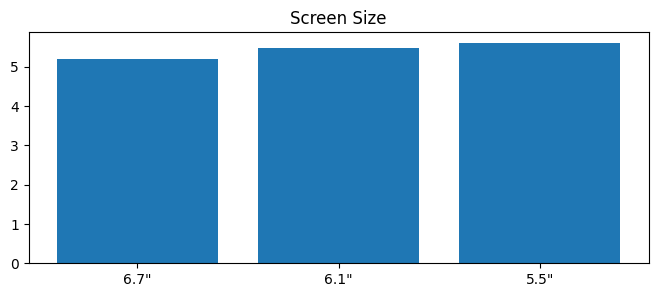

Battery Life
24 hrs    4.475000
18 hrs    5.550000
12 hrs    6.633333
Name: Value, dtype: float64


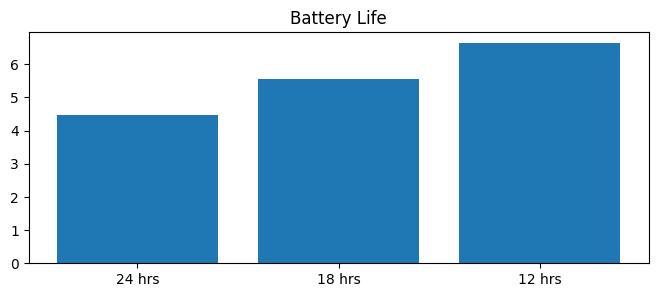

Camera Quality
48 MP     5.09
12 MP     5.10
108 MP    6.85
Name: Value, dtype: float64


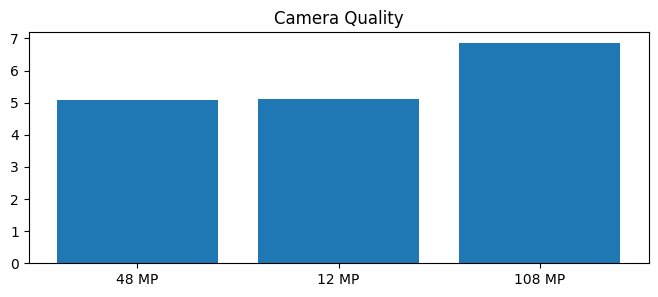

Storage Capacity
256 GB    5.180000
128 GB    5.533333
64 GB     5.975000
Name: Value, dtype: float64


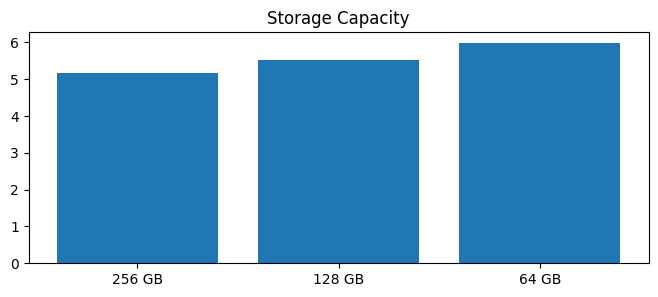

Price
$1000    5.06
$600     5.83
Name: Value, dtype: float64


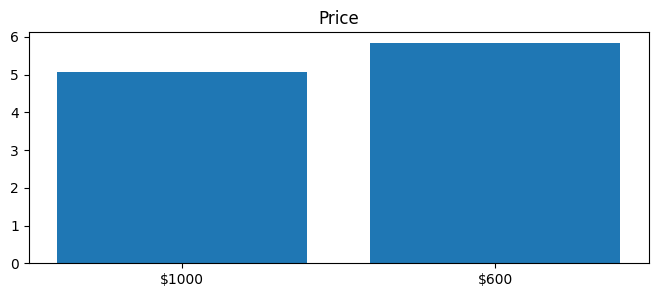

In [13]:
cols = ['Screen Size','Battery Life', 'Camera Quality','Storage Capacity','Price']
for col in cols:
    df3 = df_combined.groupby(col)['Value'].agg('mean').sort_values()
    print(df3)
    plt.figure(figsize=(8,3))
    plt.title(col)
    plt.bar(x=df3.index, height=df3.values)
    plt.show()

In [14]:
df2 = pd.get_dummies(df_combined, columns=['Screen Size','Battery Life', 'Camera Quality','Storage Capacity','Price'], drop_first=True)

In [15]:
df2.head()

,resp,Value,"Screen Size_6.1""","Screen Size_6.7""",Battery Life_18 hrs,Battery Life_24 hrs,Camera Quality_12 MP,Camera Quality_48 MP,Storage Capacity_256 GB,Storage Capacity_64 GB,Price_$600
0,Observation 1,8,True,False,False,False,False,False,True,False,True
1,Observation 1,6,False,True,True,False,False,False,False,False,False
2,Observation 1,10,False,False,False,False,False,True,False,True,True
3,Observation 1,2,False,False,False,False,True,False,False,False,False
4,Observation 1,1,False,False,False,True,False,True,True,False,False


In [16]:
df2.iloc[:, 2:] = df2.iloc[:, 2:].astype(int)
np.asarray(df2)

array([['Observation 1', 8, 1, ..., 1, 0, 1],
       ['Observation 1', 6, 0, ..., 0, 0, 0],
       ['Observation 1', 10, 0, ..., 0, 1, 1],
       ...,
       ['Observation 20', 3, 0, ..., 0, 1, 1],
       ['Observation 20', 2, 1, ..., 1, 0, 0],
       ['Observation 20', 1, 0, ..., 1, 0, 1]], dtype=object)

#### Regression Model (OLS)

In [17]:
import statsmodels.api as sm

y = df2['Value']
X = df2.drop(['resp', 'Value'], axis=1)
X['const'] = 1

lir = sm.OLS(y, X).fit()
lir.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     5.717
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           5.19e-07
Time:                        10:42:22   Log-Likelihood:                -468.35
No. Observations:                 200   AIC:                             956.7
Df Residuals:                     190   BIC:                             989.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Screen Size_6.1"           -1.4000      0.816     -1.715      0.088      -3.010       0.210
Screen Size_6.7"           -8.3000      2.000     -4.150      0.000     -12.245      -4.355
Battery Life_18 hrs         4.4500      1.414      3.147      0.002       1.661       7.239
Battery Life_24 hrs         1.6000      1.633      0.980      0.328      -1.621       4.821
Camera Quality_12 MP       -5.5500      1.155     -4.807      0.000      -7.827      -3.273
Camera Quality_48 MP        0.9000      1.414      0.636      0.525      -1.889       3.689
Storage Capacity_256 GB    -8.0500      2.160     -3.727      0.000     -12.311      -3.789
Storage Capacity_64 GB     -9.4000      2.582     -3.641      0.000     -14.493      -4.307
Price_$600                  5.8000      1.414      4.102      0.000       3.011       8.589
const                      10.6000      1.000     10.601      0.000       8.628      12.572
==============================================================================
Omnibus:                       16.451   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.898
Skew:                           0.034   Prob(JB):                       0.0524
Kurtosis:                       2.162   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
lp = lir.params
pars = pd.DataFrame({'var':lp.index, 'coeft':lp.values})
pars

,var,coeft
0,"Screen Size_6.1""",-1.40
1,"Screen Size_6.7""",-8.30
2,Battery Life_18 hrs,4.45
3,Battery Life_24 hrs,1.60
4,Camera Quality_12 MP,-5.55
5,Camera Quality_48 MP,0.90
6,Storage Capacity_256 GB,-8.05
7,Storage Capacity_64 GB,-9.40
8,Price_$600,5.80
9,const,10.60


In [19]:
dfg = pd.get_dummies(df_combined.loc[:, cols],
                     columns=cols)

cols = list(dfg.columns)

df3 = pd.DataFrame()
df3['var'] = cols
cols

['Screen Size_5.5"',
 'Screen Size_6.1"',
 'Screen Size_6.7"',
 'Battery Life_12 hrs',
 'Battery Life_18 hrs',
 'Battery Life_24 hrs',
 'Camera Quality_108 MP',
 'Camera Quality_12 MP',
 'Camera Quality_48 MP',
 'Storage Capacity_128 GB',
 'Storage Capacity_256 GB',
 'Storage Capacity_64 GB',
 'Price_$1000',
 'Price_$600']

In [20]:
df3 = df3.merge(pars, on='var', how='left')
df3 = df3.fillna(0)
df3

,var,coeft
0,"Screen Size_5.5""",0.00
1,"Screen Size_6.1""",-1.40
2,"Screen Size_6.7""",-8.30
3,Battery Life_12 hrs,0.00
4,Battery Life_18 hrs,4.45
5,Battery Life_24 hrs,1.60
6,Camera Quality_108 MP,0.00
7,Camera Quality_12 MP,-5.55
8,Camera Quality_48 MP,0.90
9,Storage Capacity_128 GB,0.00


#### Attribute Importance

In [21]:
df3['attrib'] = df3['var'].str.split('_', n=1, expand=True)[0]
df3['factors'] = df3['var'].str.split('_', n=1, expand=True)[1]

In [22]:
attrib = df3.groupby('attrib')['coeft'].agg(['min', 'max'])
attrib['imp'] = attrib['max'] - attrib['min']
attrib['imp%'] = attrib['imp']*100/(attrib['imp'].sum())
attrib = attrib.sort_values(['imp%'],ascending=False)
attrib

,min,max,imp,imp%
attrib,,,,
Storage Capacity,-9.40,0.00,9.40,27.325581
Screen Size,-8.30,0.00,8.30,24.127907
Camera Quality,-5.55,0.90,6.45,18.750000
Price,0.00,5.80,5.80,16.860465
Battery Life,0.00,4.45,4.45,12.936047


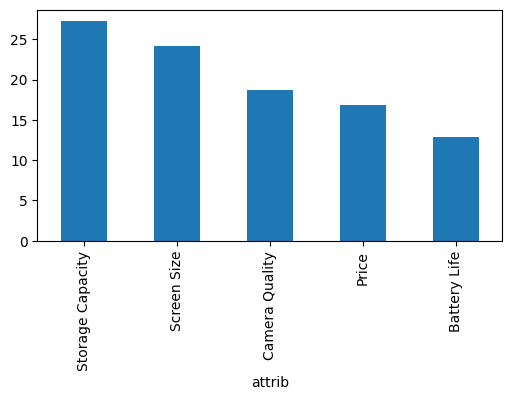

In [23]:
attrib['imp%'].plot.bar(figsize=(6,3))
plt.show()

In [24]:
fractional_design_df['Price'].unique()

array(['$600', '$1000'], dtype=object)

#### Market Share Estimation

In [25]:
list1 = ['5.5"', '6.7"', '6.1"']
list2 = ['128 GB', '256 GB', '64 GB'] 
list3 = ['48 MP', '108 MP', '12 MP'] 
list4 = ['24 hrs', '18 hrs', '12 hrs'] 
list5= ['$600', '$1000']

factors = [[i, j, k, l, m] for i in list1  
                 for j in list2 
                 for k in list3
                 for l in list4
                 for m in list5] 

In [26]:
df = pd.DataFrame(factors, columns=['Screen Size','Storage Capacity', 'Camera Quality','Battery Life','Price'])
df.head()

,Screen Size,Storage Capacity,Camera Quality,Battery Life,Price
0,"5.5""",128 GB,48 MP,24 hrs,$600
1,"5.5""",128 GB,48 MP,24 hrs,$1000
2,"5.5""",128 GB,48 MP,18 hrs,$600
3,"5.5""",128 GB,48 MP,18 hrs,$1000
4,"5.5""",128 GB,48 MP,12 hrs,$600


In [27]:
df3.head()

,var,coeft,attrib,factors
0,"Screen Size_5.5""",0.00,Screen Size,"5.5"""
1,"Screen Size_6.1""",-1.40,Screen Size,"6.1"""
2,"Screen Size_6.7""",-8.30,Screen Size,"6.7"""
3,Battery Life_12 hrs,0.00,Battery Life,12 hrs
4,Battery Life_18 hrs,4.45,Battery Life,18 hrs


In [28]:
df4 = df3.loc[:, ['factors', 'coeft']]

for fs in ['Screen Size','Battery Life', 'Camera Quality','Storage Capacity','Price']:
    df5 = df4.rename(columns = {'coeft': str('coef_'+fs),'factors':fs})
    df = df.merge(df5, on=fs)
    
print(df.head())

  Screen Size Storage Capacity Camera Quality Battery Life  Price  \
0        5.5"           128 GB          48 MP       24 hrs   $600   
1        5.5"           128 GB          48 MP       24 hrs  $1000   
2        5.5"           128 GB          48 MP       18 hrs   $600   
3        5.5"           128 GB          48 MP       18 hrs  $1000   
4        5.5"           128 GB          48 MP       12 hrs   $600   

   coef_Screen Size  coef_Battery Life  coef_Camera Quality  \
0               0.0               1.60                  0.9   
1               0.0               1.60                  0.9   
2               0.0               4.45                  0.9   
3               0.0               4.45                  0.9   
4               0.0               0.00                  0.9   

   coef_Storage Capacity  coef_Price  
0                    0.0         5.8  
1                    0.0         0.0  
2                    0.0         5.8  
3                    0.0         0.0  
4          

In [29]:
df.columns

Index(['Screen Size', 'Storage Capacity', 'Camera Quality', 'Battery Life',
       'Price', 'coef_Screen Size', 'coef_Battery Life', 'coef_Camera Quality',
       'coef_Storage Capacity', 'coef_Price'],
      dtype='object')

In [30]:
df['Tot_utils'] = df.loc[:,['coef_Screen Size', 'coef_Battery Life', 'coef_Camera Quality','coef_Storage Capacity', 'coef_Price']].sum(axis=1)
df['exp_tot_util'] = np.exp(0.8*df['Tot_utils'])
Tot_Exp_Util = df['exp_tot_util'].sum()
df['Mkt Share'] = df['exp_tot_util'] /Tot_Exp_Util

In [31]:
df = df.sort_values('Tot_utils', ascending=False)
df.head()

,Screen Size,Storage Capacity,Camera Quality,Battery Life,Price,coef_Screen Size,coef_Battery Life,coef_Camera Quality,coef_Storage Capacity,coef_Price,Tot_utils,exp_tot_util,Mkt Share
2,"5.5""",128 GB,48 MP,18 hrs,$600,0.0,4.45,0.9,0.0,5.8,11.15,7480.089230,0.441130
8,"5.5""",128 GB,108 MP,18 hrs,$600,0.0,4.45,0.0,0.0,5.8,10.25,3640.950307,0.214721
110,"6.1""",128 GB,48 MP,18 hrs,$600,-1.4,4.45,0.9,0.0,5.8,9.75,2440.601978,0.143932
116,"6.1""",128 GB,108 MP,18 hrs,$600,-1.4,4.45,0.0,0.0,5.8,8.85,1187.968519,0.070059
0,"5.5""",128 GB,48 MP,24 hrs,$600,0.0,1.60,0.9,0.0,5.8,8.30,765.094993,0.045121
